In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/20192.L3/master/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources
endpoint https://m3g87w9l3k.execute-api.us-west-2.amazonaws.com/dev/rlxmooc


## Objetivos del módulo

Entender el concepto de lista generalizada, sus posibles representaciones, su manipulación y su uso


## Preguntas básicas

- ¿Qué es una lista generalizada?
- ¿Cómo se define y se implementa?
- ¿Qué consecuencias tienen las decisiones de implementación sobre complejidad en las operaciones de la lista?

## Introducción

Una lista generalizada es un conjunto finito de $n$  elementos ($n\ge 0$) cada uno de los cuales es un átomo u otra lista generalizada. La lista generalizada es una estructura recursiva por definición ya que se define en términos de si mismo. Por ejemplo:

		W = (a, (b, c), d, (e, (f, g)), h)      

Los átomos se presentan separados por comas, y cuando un elemento sea otra lista, ésta irá entre paréntesis. 

Una lista generalizada se puede representar como una lista ligada. La configuración de cada nodo usa 3 campos:

- Marca: `0` si el nodo es un átomo o `1` si es una sublista
- Dato: el átomo o una referencia a una sublista.
- Siguiente: Referencia al siguiente nodo o `None` si no hay más nodos.

Por ejemplo, la lista anterior se representaría de la siguiente manera.

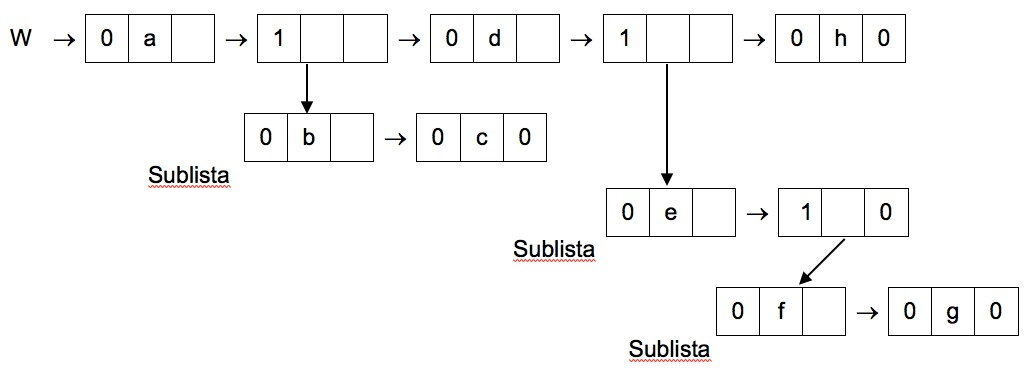

In [3]:
from IPython.display import Image
Image(filename='local/imgs/lista_generalizada.jpg', width=700)

Esta lista se representaría en Python de la siguiente manera

In [4]:
a,b,c,d,e,f,g,h = list(range(8))
W = [a, [b,c], d, [e, [f,g]], h]
print(W)
print(len(W))
print(W[3], ":", W[3][0], ":", W[3][1][0])

[0, [1, 2], 3, [4, [5, 6]], 7]
5
[4, [5, 6]] : 4 : 5


Realicemos nosotros nuestra propia implementación. Para ello definimos una clase para representar cualquier nodo. Observa que no usamos un campo explícito para diferenciar si tenemos un átomo o una nueva lista. Esto lo resolveremos llamando a `type`.

In [0]:
class Node:
    def __init__(self, value, next=None):
        assert next is None or isinstance(next,Node), "next must be Node, not %s"%(type(next))
        self.value = value
        self.next  = next
        
    def __repr__(self):
        return str(self.value)

In [6]:
n = Node(10, Node(20, Node(30)))

k=n
print(k, end=' ')
while (k.next is not None):
    print("--> %s"%k.next, end=' ')
    k = k.next

10 --> 20 --> 30 

Y definimos una clase para una lista generalizada. Fíjate que **no usamos ninguna `list` de python** ya que precisamente es lo que estamos implementando.

In [0]:
class L(object):
    def __init__ (self, first_node=None):
        assert first_node is None or isinstance(first_node,Node), "first must be Node, not %s"%(type(first_node))
        self.first_node = first_node
        
    def __getitem__(self, idx):
        k = self.first_node
        for i in range(idx):
            assert k.next is not None, "index %s out of range"%(str(idx))
            k = k.next  
        return k.value
    
    def __len__(self):
        k = self.first_node
        if k is None:
            return 0
        i=1
        while k.next is not None:
            i+=1
            k = k.next
        return i
            
    def __repr__ (self):
        if self.first_node is None:
            return "[]"
        
        s = "[ %s"%self.first_node
        k=self.first_node
        while (k.next is not None):
            s += ", %s"%k.next
            k = k.next
    
        return s+" ]"

Fíjate cómo creamos una lista sólo con átomos

In [8]:
W = L(Node(10, Node(20, Node(30))))
print(W)
print("len =", len(W))

[ 10, 20, 30 ]
len = 3


Y una lista con sublistas

In [9]:
W=L(Node(10, Node(L(Node(14, Node(18))), Node(20, Node(30)))))
print(W)
print("len =", len(W))

[ 10, [ 14, 18 ], 20, 30 ]
len = 4


En este caso una sublista va encapsulada dentro de un nodo

In [10]:
print(Node(L(Node(14, Node(18)))))
print(W[1])
print("len sublista =", len(W[1]))

[ 14, 18 ]
[ 14, 18 ]
len sublista = 2


Observa la implementación del método `getitem` y cómo de manera natural soporta el indexado de sublistas

In [11]:
W=L(Node(10, Node(L(Node(14, Node(18))), Node(20, Node(30)))))
print("the list:          ", W)
print("element at 1:      ", W[1])
print("element at 2:      ", W[2])
print("element of sublist:", W[1][0])

the list:           [ 10, [ 14, 18 ], 20, 30 ]
element at 1:       [ 14, 18 ]
element at 2:       20
element of sublist: 14


Por supuesto, también soportamos la lista vacía

In [12]:
W = L()
print(W)
print("len = ", len(W))

[]
len =  0


Añadimos un método suma que me concatene dos listas generalizadas

In [0]:
class L(L):
    
    def __add__(self, M):
        # obtiene el ultimo elemento de esta lista
        k = self.first_node
        
        # si la lista actual no tiene elementos
        if k is None:
            self.first_node = M.first_node
            return self
        
        # en caso contrario la agregamos al ultimo nodo
        while k.next is not None:
            k = k.next
        
        k.next = M.first_node
        return self

In [14]:
W = L(Node(10, Node(20, Node(30))))
Z = L(Node(3, Node(2)))
print(W)
print(Z)
print(W + Z + L())

[ 10, 20, 30 ]
[ 3, 2 ]
[ 10, 20, 30, 3, 2 ]


pero observa que esta implementación **modifica** la lista del primer argumento de la adición

In [15]:
W = L(Node(10, Node(20, Node(30))))
Z = L(Node(3, Node(2)))
print("antes de sumar")
print("W", W)
print("Z", Z)
X = W + Z
print("después de sumar")
print("W", W)
print("Z", Z)
print("X", X)

antes de sumar
W [ 10, 20, 30 ]
Z [ 3, 2 ]
después de sumar
W [ 10, 20, 30, 3, 2 ]
Z [ 3, 2 ]
X [ 10, 20, 30, 3, 2 ]


esto induce una recursividad infinita cuando hacemos algo como esto:

In [16]:
X = W + Z + W

KeyboardInterrupt: ignored

en los ejercicios reparás este problema

### polinomios

usemos listas para representar el siguiente polinomio

  $$ 2x^3y^2z^2 + 5x^3yz^2 + 7xy^2z^2 + 5x^2yz + 4xz + 4x^3y^2 + 8y + 9$$
  
primero definimos una clase para los términos y luego una subclase de `L` para representar los polinomios

In [0]:
from IPython.display import Math

class Term(object):
     pass

class XYZTerm(Term):
    
    def __init__(self, coef, ex, ey, ez):
        assert (isinstance(coef, float) or isinstance(coef,int)) and \
                isinstance(ex, int) and \
                isinstance(ey, int) and \
                isinstance(ez, int) , "coef/exp must be float/int"
                
        self.coef = coef
        self.ex   = ex
        self.ey   = ey
        self.ez   = ez

    def get_math_representation(self):
        s = "" if self.coef==0 else \
            ("%s"%str(self.coef) if self.coef!=1 else "") +\
            (" x" if self.ex==1 else (" x^%d"%self.ex if self.ex!=0 else "")) +\
            (" y" if self.ey==1 else (" y^%d"%self.ey if self.ey!=0 else "")) +\
            (" z" if self.ez==1 else (" z^%d"%self.ez if self.ez!=0 else ""))
        return s
        
    def show(self):
        from IPython.display import Math, HTML, display
        display(HTML("<script src='https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default'></script>"))          
        return Math(self.get_math_representation())
       
    def __repr__(self):
        return self.get_math_representation()

In [22]:
t = XYZTerm(2,4,1,0)
t

2 x^4 y

In [23]:
t.show()

<IPython.core.display.Math object>

In [24]:
t = XYZTerm(1,4,1,0)
t

 x^4 y

In [0]:
class Pol(L):
    def get_math_representation(self):
        if self.first_node is None:
            return Math("")
        
        k = self.first_node
        s = k.value.get_math_representation()
        
        while (k.next is not None):
            s += "+"+k.next.value.get_math_representation()
            k = k.next
    
        s = s.replace("+-", "-")
        return s
    
    def show(self):
        from IPython.display import Math, HTML, display
        display(HTML("<script src='https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default'></script>"))          
        return Math(self.get_math_representation())

In [26]:
pol = Pol(Node(XYZTerm(2,3,2,2), Node(XYZTerm(5,3,1,2), Node(XYZTerm(7,1,2,2), \
          Node(XYZTerm(5,2,1,1), Node(XYZTerm(4,1,0,1), Node(XYZTerm(4,3,2,0),\
          Node(XYZTerm(8,0,1,0), Node(XYZTerm(9,0,0,0) )) )  )  ) ))))
pol

[ 2 x^3 y^2 z^2, 5 x^3 y z^2, 7 x y^2 z^2, 5 x^2 y z, 4 x z, 4 x^3 y^2, 8 y, 9 ]

In [27]:
pol.show()

<IPython.core.display.Math object>

Pero esta implementación está muy atada a esta forma concreta de polinomios con tres variables, llamadas $x$, $y$, $z$. Creemos una representación más flexible, observando que en el polinomio anterior podemos sacar términos comunes por cada variable.

  $$ 2x^3y^2z^2 + 5x^3yz^2 + 7xy^2z^2 + 5x^2yz + 4xz + 4x^3y^2 + 8y + 9$$

$$=$$

$$((2y^2 + 5y)x^3 + 7y^2x)z^2 + (5yx^2+ 4x)z + (4y^2x^3 + (8y +9))$$

In [0]:
class VarTerm(Term):
    def __init__(self, coef, var, exp=1):
        assert (isinstance(coef, float) or isinstance(coef,int)) and \
                isinstance(exp, int) and isinstance(var, str) and len(var)==1
        self.coef = coef
        self.var  = var
        self.exp  = exp
        
    def get_math_representation(self):
        s = "" if self.coef==0 else \
            ("%s"%str(self.coef) if self.coef!=1 else "") +\
            (" %s"%self.var if self.exp==1 else (" %s^%d"%(self.var, self.exp) if self.exp!=0 else "")) 
        return s
    
    def show(self):
        from IPython.display import Math, HTML, display
        display(HTML("<script src='https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default'></script>"))          
        return Math(self.get_math_representation())
       
    def __repr__(self):
        return self.get_math_representation()        

    
class VarPol(Pol):
    def __init__(self, first_node, vterm=VarTerm(1,"k",0)):
        super(VarPol, self).__init__(first_node)
        assert vterm is not None and isinstance(vterm, VarTerm), "must specify a VarTerm" 
        self.vterm = vterm
        
    def get_math_representation(self):
        return self.vterm.get_math_representation()+"("+super(VarPol, self).get_math_representation()+")"

In [30]:
t = VarTerm(2, "x", 3)
t

2 x^3

In [31]:
t.show()

<IPython.core.display.Math object>

In [32]:
p1 = VarPol( vterm=VarTerm(1,"x",3), first_node=Node(VarTerm(2,"y", 2), Node(VarTerm(5,"y"))))
p1.show()

<IPython.core.display.Math object>

In [33]:
p2 = VarPol(first_node=Node(VarTerm(7,"y",2)), vterm=VarTerm(1,"x",1))
p2.show()

<IPython.core.display.Math object>

In [34]:
p3 = VarPol(first_node=Node(p1, Node(p2)), vterm=VarTerm(1,"z", 2))
p3.show()

<IPython.core.display.Math object>

In [35]:
p4 = VarPol( vterm=VarTerm(1,"x",2), first_node=Node(VarTerm(5,"y", 1)))
p4.show()

<IPython.core.display.Math object>

In [36]:
p5 = VarPol( first_node=Node(p4, Node(VarTerm(4,"x",1))), vterm=VarTerm(1,"z",1))
p5.show()

<IPython.core.display.Math object>

In [37]:
p6 = VarPol( vterm=VarTerm(1,"x",3), first_node=Node(VarTerm(4,"y", 2)))
p6.show()

<IPython.core.display.Math object>

In [38]:
p7 = VarPol(first_node=Node(VarTerm(9,"y", 0), Node(VarTerm(8,"y",1))))
p7.show()

<IPython.core.display.Math object>

In [39]:
p8 = VarPol(first_node=Node(p3, Node(p5, Node(p6, Node(p7)))))
p8.show()

<IPython.core.display.Math object>

inspeccionemos el polinomio resultante

In [40]:
len(p8)

4

In [41]:
print(p8.vterm.get_math_representation())
for i in range(len(p8)):
    print("term %d %s"%(i, p8[i].get_math_representation()))


term 0  z^2( x^3(2 y^2+5 y)+ x(7 y^2))
term 1  z( x^2(5 y)+4 x)
term 2  x^3(4 y^2)
term 3 (9+8 y)


In [42]:
k = p8[0]
print("vterm:", k.vterm.get_math_representation())
print("len:   ", len(k))

for i in range(len(k)):
    print("term %d %s"%(i, k[i].get_math_representation()))

k.show()

vterm:  z^2
len:    2
term 0  x^3(2 y^2+5 y)
term 1  x(7 y^2)


<IPython.core.display.Math object>

In [43]:
k = p8[0][0]
print("vterm:", k.vterm.get_math_representation())
print("len:   ", len(k))

for i in range(len(k)):
    print("term %d %s"%(i, k[i].get_math_representation()))

k.show()

vterm:  x^3
len:    2
term 0 2 y^2
term 1 5 y


<IPython.core.display.Math object>

## Ejercicios propuestos

- obtén experimentalmente la complejidad computacional de cada método y arguméntalo.
- implementa la suma de polinomios `VarPol`
- después de hacer los ejercicios, cómo modificarías `Node` para facilitar el acceso a índices negativos?